In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [7]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [8]:
df=df[df['location']=='Russia']
df=df[['date','new_cases']]

In [9]:
df

,date,new_cases
38565,2019-12-31,0.0
38566,2020-01-01,0.0
38567,2020-01-02,0.0
38568,2020-01-03,0.0
38569,2020-01-04,0.0
...,...,...
38848,2020-10-09,11493.0
38849,2020-10-10,12126.0
38850,2020-10-11,12846.0
38851,2020-10-12,13634.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


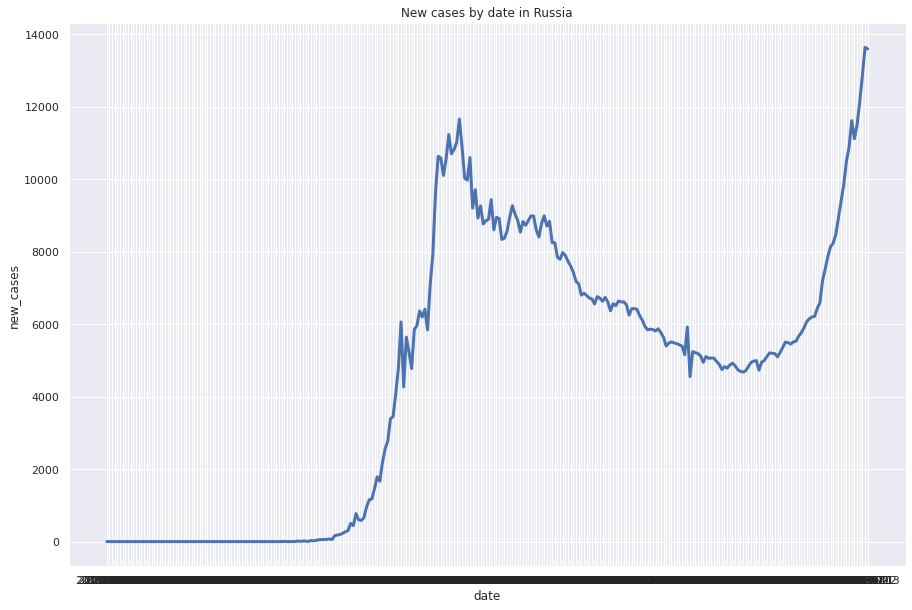

In [10]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Russia')
plt.show()


#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [11]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [12]:
case_series=case_series.fillna(0)
case_series

,new_cases
38565,0.0
38566,0.0
38567,0.0
38568,0.0
38569,0.0
...,...
38848,11493.0
38849,12126.0
38850,12846.0
38851,13634.0


In [13]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
timestep=3
X_case, y_case = create_dataset(case_series, timestep)
#X_death,y_death=create_dataset(death_series,timestep)

In [15]:
train_size=int(len(case_series)*0.95)

In [16]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [17]:

n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

x_case_test=x_case_valid.reshape((x_case_valid.shape[0], x_case_valid.shape[1], n_features))




## **Model preperation:**

In [18]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
#model.add(Bidirectional(LSTM(20,activation='relu')))
#model.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(30,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=300, verbose=2,validation_data=(x_case_test,y_case_valid))

Epoch 1/300
9/9 - 1s - loss: 31978598.0000 - val_loss: 127351088.0000
Epoch 2/300
9/9 - 0s - loss: 28972798.0000 - val_loss: 108666464.0000
Epoch 3/300
9/9 - 0s - loss: 25467526.0000 - val_loss: 96896816.0000
Epoch 4/300
9/9 - 0s - loss: 21386152.0000 - val_loss: 75443144.0000
Epoch 5/300
9/9 - 0s - loss: 14083833.0000 - val_loss: 38165632.0000
Epoch 6/300
9/9 - 0s - loss: 7508603.0000 - val_loss: 9838949.0000
Epoch 7/300
9/9 - 0s - loss: 476844.5312 - val_loss: 257625.6094
Epoch 8/300
9/9 - 0s - loss: 403953.1562 - val_loss: 129317.1484
Epoch 9/300
9/9 - 0s - loss: 231314.3125 - val_loss: 1157533.1250
Epoch 10/300
9/9 - 0s - loss: 195328.7812 - val_loss: 894591.1875
Epoch 11/300
9/9 - 0s - loss: 195752.7344 - val_loss: 770948.0000
Epoch 12/300
9/9 - 0s - loss: 190501.3906 - val_loss: 992753.4375
Epoch 13/300
9/9 - 0s - loss: 189456.6406 - val_loss: 1051265.1250
Epoch 14/300
9/9 - 0s - loss: 184227.3438 - val_loss: 9000356.0000
Epoch 15/300
9/9 - 0s - loss: 1622895.0000 - val_loss: 183

# **Check validation data:**

In [19]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size:(train_size+timestep)])

x_input=numpy.array(x_input)



In [20]:
x_input

array([8135., 8232., 8481.], dtype=float32)

In [21]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[8388.218]
1 day input [8232.    8481.    8388.218]
[8232.    8481.    8388.218]
[[[8232.   ]
  [8481.   ]
  [8388.218]]]
1 day output [[8463.033]]
2 day input [8481.    8388.218 8463.033]
[8481.    8388.218 8463.033]
[[[8481.   ]
  [8388.218]
  [8463.033]]]
2 day output [[8455.755]]
3 day input [8388.218 8463.033 8455.755]
[8388.218 8463.033 8455.755]
[[[8388.218]
  [8463.033]
  [8455.755]]]
3 day output [[8488.772]]
4 day input [8463.033 8455.755 8488.772]
[8463.033 8455.755 8488.772]
[[[8463.033]
  [8455.755]
  [8488.772]]]
4 day output [[8502.095]]
5 day input [8455.755 8488.772 8502.095]
[8455.755 8488.772 8502.095]
[[[8455.755]
  [8488.772]
  [8502.095]]]
5 day output [[8525.128]]
6 day input [8488.772 8502.095 8525.128]
[8488.772 8502.095 8525.128]
[[[8488.772]
  [8502.095]
  [8525.128]]]
6 day output [[8543.458]]
7 day input [8502.095 8525.128 8543.458]
[8502.095 8525.128 8543.458]
[[[8502.095]
  [8525.128]
  [8543.458]]]
7 day output [[8564.148]]
8 day input [8525.128 8543.458

In [22]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [23]:
lst_output=numpy.array(lst_output)
lst_output

array([8388.218, 8463.033, 8455.755, 8488.772, 8502.095, 8525.128,
       8543.458, 8564.148, 8583.739, 8603.927, 8623.88 , 8644.004,
       8664.102, 8684.27 , 8704.462], dtype=float32)

No handles with labels found to put in legend.


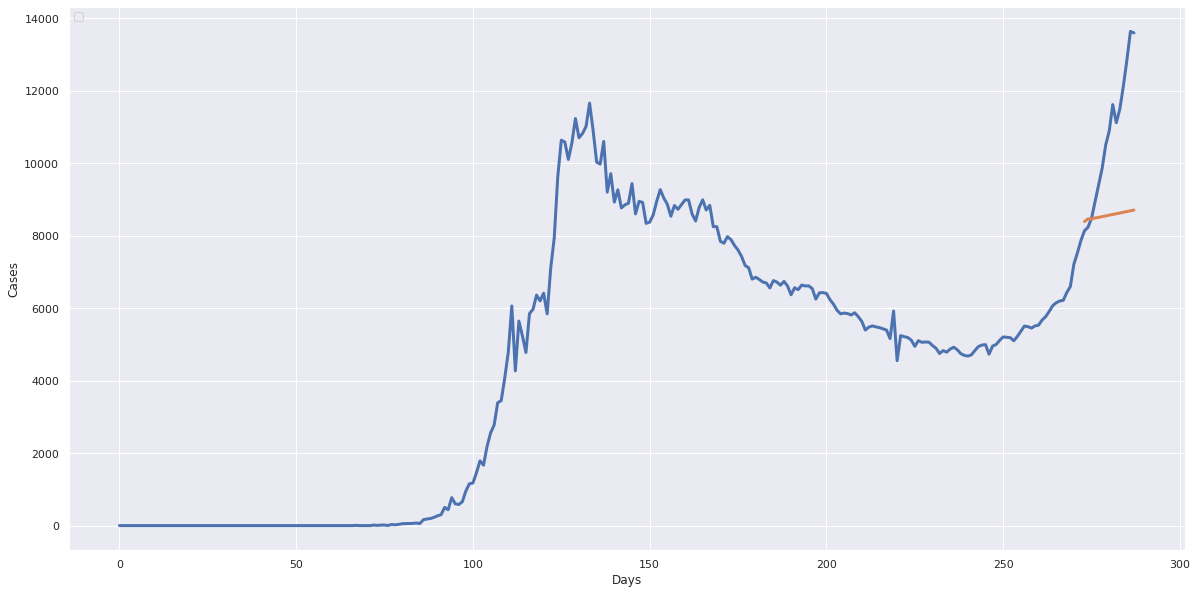

In [25]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [26]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [27]:

x_input

array([12846., 13634., 13592.], dtype=float32)

In [28]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[13656.753]
1 day input [13634.    13592.    13656.753]
[13634.    13592.    13656.753]
[[[13634.   ]
  [13592.   ]
  [13656.753]]]
1 day output [[13669.277]]
2 day input [13592.    13656.753 13669.277]
[13592.    13656.753 13669.277]
[[[13592.   ]
  [13656.753]
  [13669.277]]]
2 day output [[13707.487]]
3 day input [13656.753 13669.277 13707.487]
[13656.753 13669.277 13707.487]
[[[13656.753]
  [13669.277]
  [13707.487]]]
3 day output [[13733.193]]
4 day input [13669.277 13707.487 13733.193]
[13669.277 13707.487 13733.193]
[[[13669.277]
  [13707.487]
  [13733.193]]]
4 day output [[13765.112]]
5 day input [13707.487 13733.193 13765.112]
[13707.487 13733.193 13765.112]
[[[13707.487]
  [13733.193]
  [13765.112]]]
5 day output [[13794.071]]
6 day input [13733.193 13765.112 13794.071]
[13733.193 13765.112 13794.071]
[[[13733.193]
  [13765.112]
  [13794.071]]]
6 day output [[13824.568]]
7 day input [13765.112 13794.071 13824.568]
[13765.112 13794.071 13824.568]
[[[13765.112]
  [13794.071]
  

In [29]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


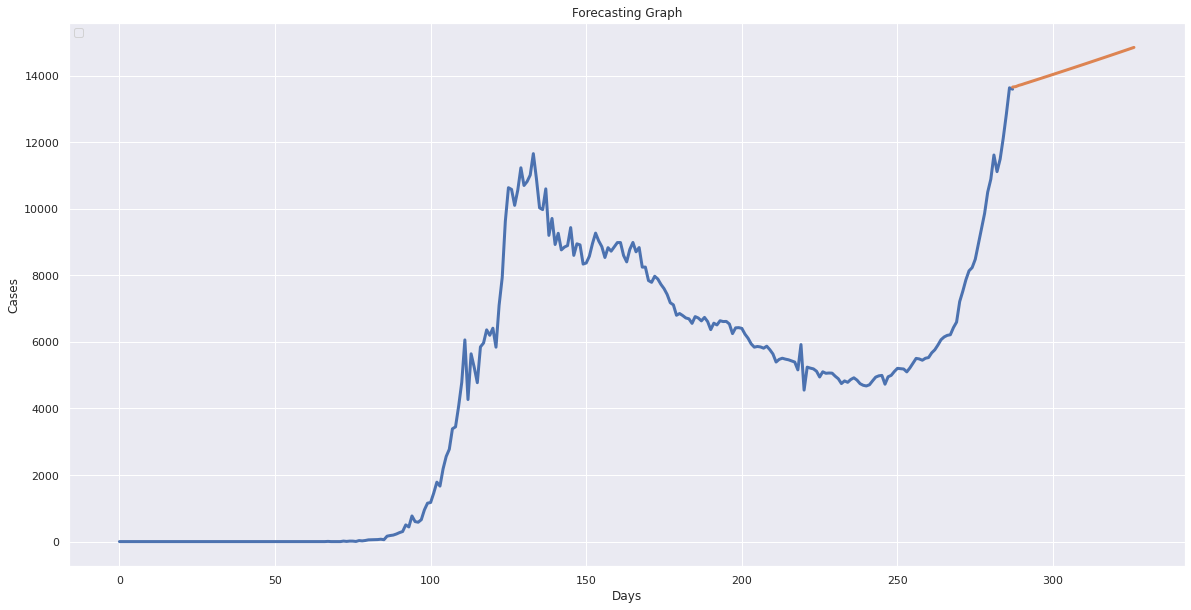

In [30]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()